## [0112] 통계적사고

### 1. 목적
##### 벚꽃의 개화시기는 평균적으로 4월이다. 한편, 4월은 미세먼지의 농도가 높은 시기이기도 하다. 대기오염도를 고려하였을 때, 벚꽃구경을 가기에 가장 좋은 시간대는 언제일까? 


### 2. 통계적사고

#### 1) 4월 미세먼지/초미세먼지 농도가 연평균 농도와 유의미한 차이가 있는가?
-> ‘2019년 연평균 미세먼지/초미세먼지 농도’와 ‘2019.4월의 미세먼지/초미세먼지  농도’ 표본을 가지고 t-test 진행


#### 2) 9시~21시 사이 중 2019.4월 미세먼지/초미세먼지 농도가 낮은 시간대를 각각 구한다. 해당 시간대의 표본과 2019.4월의 표본 사이의 t-test진행
-> 해당 시간대에 벚꽃구경을 가는 것이 대기오염도 측면에서 유의미하게 차이가 있는지 확인


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
time_1904=pd.read_csv('서울시_기간별_시간평균_대기환경_정보_2019.04.csv',encoding = 'cp949')
year=pd.read_csv('서울시 년도별 평균 대기오염도 정보.csv',encoding = 'cp949')

In [7]:
time_1904=time_1904.rename(columns={'미세먼지 1시간(㎍/㎥)':'dust1h','미세먼지 24시간(㎍/㎥)':'dust24h','이산화질소농도(ppm)':'no2','초미세먼지(㎍/㎥)':'fdust','아황산가스농도(ppm)':'so2','오존(ppm)':'o3','이산화질소농도(ppm)':'no2','일산화탄소농도(ppm)':'co'})
time_df_1904=time_1904

time_df_1904=time_df_1904.astype({'측정일시':'str'})
time_df_1904['timeline1904']=time_df_1904['측정일시'].str[8:10]

time_df1_1904=time_df_1904.groupby('timeline1904').mean()
time_df1_1904.head()

,권역코드,측정소코드,dust1h,dust24h,fdust,o3,no2,co,so2
timeline1904,,,,,,,,,
00,102.24,111211.04,37.960000,39.793333,19.684000,0.021675,0.035156,0.483733,0.003763
01,102.24,111211.04,37.556000,39.316000,19.925333,0.021225,0.033891,0.494133,0.003747
02,102.24,111211.04,36.138667,38.692000,19.742667,0.022325,0.030483,0.490933,0.003720
03,102.24,111211.04,35.590667,38.074667,20.464000,0.022155,0.028635,0.488400,0.003669
04,102.24,111211.04,35.092000,37.308000,20.466667,0.021225,0.027949,0.486133,0.003621


In [26]:
#2019년 4월 미세먼지 데이터
time_2019_dust1=time_1904['dust1h']
#2019년 4월 초미세먼지 데이터
time_2019_fdust=time_1904['fdust']

In [20]:
year=year.rename(columns={'미세먼지(㎍/㎥)':'dust','이산화질소농도(ppm)':'no2','초미세먼지(㎍/㎥)':'fdust','아황산가스(ppm)':'so2','오존농도(ppm)':'o3','이산화질소농도(ppm)':'no2','일산화탄소농도(ppm)':'co'})
year

,측정년도,측정소명,no2,o3,co,so2,dust,fdust
0,2023,강남구,0.035,0.015,0.7,0.004,52.0,35.0
1,2023,강남대로,0.039,0.011,0.9,0.004,56.0,40.0
2,2023,강동구,0.030,0.012,0.6,0.003,55.0,40.0
3,2023,강변북로,0.042,0.010,0.8,0.003,54.0,40.0
4,2023,강북구,0.029,0.019,0.7,0.003,51.0,33.0
...,...,...,...,...,...,...,...,...
1223,1987,서초구,0.037,0.017,2.9,0.064,NaN,NaN
1224,1987,성동구,0.035,0.022,3.8,0.094,NaN,NaN
1225,1987,송파구,0.032,0.014,1.8,NaN,NaN,NaN
1226,1987,송파구2,0.048,0.005,2.0,0.040,NaN,NaN


In [21]:
year_all=year.groupby('측정년도').mean()
year_all

,no2,o3,co,so2,dust,fdust
측정년도,,,,,,
1987,0.034500,0.011800,3.040000,0.070889,NaN,NaN
1988,0.028600,0.010100,3.020000,0.073100,68.000000,NaN
1989,0.032900,0.010700,3.280000,0.070300,61.000000,NaN
1990,0.030455,0.011000,2.745455,0.047364,57.000000,NaN
1991,0.032545,0.012545,1.945455,0.036909,78.000000,NaN
1992,0.037833,0.012167,1.825000,0.035250,68.000000,NaN
1993,0.040077,0.011462,1.730769,0.023615,NaN,NaN
1994,0.039923,0.013769,1.453846,0.021385,NaN,NaN
1995,0.038440,0.012682,1.496000,0.017682,76.600000,NaN


In [23]:
year_2019=year.loc[year['측정년도']==2019,:]

In [30]:
#2019년 미세먼지 데이터
year_2019_dust=year_2019['dust']
#2019년 초미세먼지 데이터
year_2019_fdust=year_2019['fdust']

### 1) 2019년과 2019년 4월 비교

#### 1-1) 귀무가설 : 2019년 연평균 미세먼지 농도와 2019년 4월 연평균 미세먼지 농도가 같다.

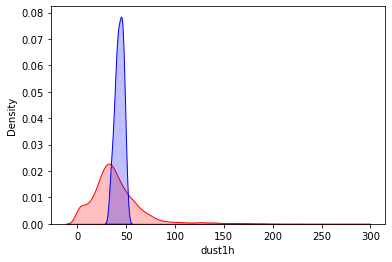

In [34]:
sns.kdeplot(data=time_2019_dust1, color="red", shade=True)
sns.kdeplot(data=year_2019_dust, color="blue", shade=True)
plt.show()
#등분산 X

In [39]:
from scipy import stats

year_april_dust=stats.ttest_ind(time_2019_dust1,year_2019_dust,equal_var=False,alternative="two-sided")
year_april_dust

Ttest_indResult(statistic=-4.5096543030599, pvalue=3.0128734664679925e-05)

#### p-value < 0.05 이므로 귀무가설을 기각할 수 있다.
#### 2019년 4월의 평균 미세먼지 농도는 연평균 미세먼지 농도와 유의미한 차이가 있다.

#### 2) 귀무가설 : 2019년 연평균 초미세먼지 농도와 2019년 4월 연평균 초미세먼지 농도가 같다.

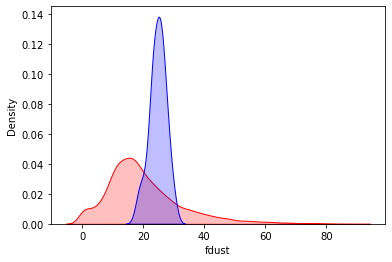

In [38]:
sns.kdeplot(data=time_2019_fdust, color="red", shade=True)
sns.kdeplot(data=year_2019_fdust, color="blue", shade=True)
plt.show()
#등분산X

In [40]:
from scipy import stats

year_april_fdust=stats.ttest_ind(time_2019_fdust,year_2019_fdust,equal_var=False,alternative="two-sided")
year_april_fdust

Ttest_indResult(statistic=-11.233067650141532, pvalue=7.368677630369646e-16)

#### p-value < 0.05 이므로 귀무가설을 기각할 수 있다.
#### 2019년 4월의 평균 초미세먼지 농도는 연평균 초미세먼지 농도와 유의미한 차이가 있다.

### 2) 2019년 4월 시간대별 비교

In [44]:
time_df1_1904.sort_values(by='dust1h',ascending=True, inplace=False)
#가장 낮은 시간대는 04~06시 사이지만, 활동시간을 고려해서 06~08시로 선택

,권역코드,측정소코드,dust1h,dust24h,fdust,o3,no2,co,so2
timeline1904,,,,,,,,,
06,102.24,111211.04,34.649333,36.456000,20.609333,0.016547,0.032184,0.499200,0.003596
05,102.24,111211.04,34.756000,36.778667,20.804000,0.019531,0.028732,0.484000,0.003589
04,102.24,111211.04,35.092000,37.308000,20.466667,0.021225,0.027949,0.486133,0.003621
03,102.24,111211.04,35.590667,38.074667,20.464000,0.022155,0.028635,0.488400,0.003669
02,102.24,111211.04,36.138667,38.692000,19.742667,0.022325,0.030483,0.490933,0.003720
07,102.24,111211.04,36.645333,36.378667,21.562667,0.013840,0.037104,0.531467,0.003627
01,102.24,111211.04,37.556000,39.316000,19.925333,0.021225,0.033891,0.494133,0.003747
00,102.24,111211.04,37.960000,39.793333,19.684000,0.021675,0.035156,0.483733,0.003763
08,102.24,111211.04,38.784000,36.732000,21.718667,0.014455,0.038888,0.550267,0.003809


In [64]:
time_df1_1904.sort_values(by='fdust',ascending=True, inplace=False)
#가장 낮은 시간대는 14~16시 사이

,권역코드,측정소코드,dust1h,dust24h,fdust,o3,no2,co,so2
timeline1904,,,,,,,,,
16,102.24,111211.04,43.996000,41.449333,18.477333,0.046559,0.018827,0.359867,0.003727
15,102.24,111211.04,43.577333,41.022667,18.716000,0.045701,0.018511,0.363467,0.003708
14,102.24,111211.04,41.961333,40.746667,18.766667,0.043808,0.019337,0.372000,0.003849
18,102.24,111211.04,42.508000,42.324000,18.885333,0.043091,0.021832,0.385867,0.003751
17,102.24,111211.04,42.741333,41.934667,18.929333,0.045380,0.019847,0.373200,0.003781
22,102.24,111211.04,38.789333,41.176000,19.188000,0.026901,0.032229,0.462000,0.003757
20,102.24,111211.04,41.254667,42.340000,19.248000,0.034241,0.028423,0.426133,0.003809
19,102.24,111211.04,42.193333,42.533333,19.500000,0.039032,0.025139,0.406667,0.003800
00,102.24,111211.04,37.960000,39.793333,19.684000,0.021675,0.035156,0.483733,0.003763


In [72]:
time_04_dust=time_df1_1904.reset_index()
time_04_dust=time_04_dust.loc[6:8,'dust1h']
time_04_dust

6    34.649333
7    36.645333
8    38.784000
Name: dust1h, dtype: float64

In [73]:
time_04_fdust=time_df1_1904.reset_index()
time_04_fdust=time_04_fdust.loc[14:16,'fdust']
time_04_fdust

14    18.766667
15    18.716000
16    18.477333
Name: fdust, dtype: float64

#### 1) 귀무가설 : 미세먼지농도가 가장 낮은 시간대 평균과 일평균 미세먼지 농도는 같다.


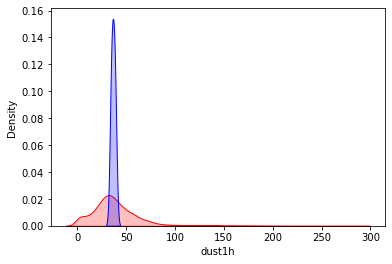

In [61]:
sns.kdeplot(data=time_2019_dust1, color="red", shade=True)
sns.kdeplot(data=time_04_dust, color="blue", shade=True)
plt.show()
#등분산X

In [62]:
from scipy import stats

time_april_dust=stats.ttest_ind(time_2019_dust1,time_04_dust,equal_var=False,alternative="two-sided")
time_april_dust

Ttest_indResult(statistic=2.695948345632737, pvalue=0.107583457882845)

#### p-value > 0.05 이므로 귀무가설을 기각할 수 없다.
#### 2019년 4월의 평균 미세먼지 농도는 06시~08시 평균 미세먼지 농도와 유의미한 차이가 없다.

#### 2) 귀무가설 : 초미세먼지농도가 가장 낮은 시간대 평균과 일평균 초미세먼지 농도는 같다.

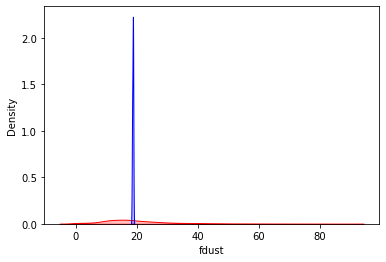

In [76]:
sns.kdeplot(data=time_2019_fdust, color="red", shade=True)
sns.kdeplot(data=time_04_fdust, color="blue", shade=True)
plt.show()
#등분산X

In [77]:
from scipy import stats

time_april_dust=stats.ttest_ind(time_2019_fdust,time_04_fdust,equal_var=False,alternative="two-sided")
time_april_dust

Ttest_indResult(statistic=12.31078015430612, pvalue=6.508395639066022e-07)

#### p-value < 0.05 이므로 귀무가설을 기각할 수 있다.
#### 2019년 4월의 평균 초미세먼지 농도는 14시~16시 평균 초미세먼지 농도와 유의미한 차이가 있다.